## 第4章 编写结构化程序

In [20]:
import nltk
from nltk import word_tokenize

### 赋值

In [6]:
a = 'a'
b = 'a'

In [8]:
id(a), id(b)#相同的字符串在内存中是同一个地址，变量名只是对字符串的引用


(1689404042912, 1689404042912)

In [9]:
a = "abcde"

In [10]:
a[1]

'b'

In [12]:
a[1] = 'x'#不能对字符串中的某一个字符赋值改变

TypeError: 'str' object does not support item assignment

In [13]:
#切片是重新复制了一个字符串
a = a[0:1] + 'x' + a[2:]

In [14]:
a

'axcde'

In [4]:
a = ['a'] * 5
a[1]='b'

In [5]:
id(a[1]), id(a[2]),id(a[3])

(1689404041232, 1689404042912, 1689404042912)

In [7]:
nest = [[]]*3
nest
nest = [[],[],[]]

[[], [], []]

In [8]:
nest[1].append('python')#内层的列表上是同一个引用
nest

[['python'], ['python'], ['python']]

In [9]:
nest[1] = ['monty']
nest

[['python'], ['monty'], ['python']]

### 等式
is:本身是否相同； ==:值是否相同

In [16]:
size = 5
python = ['python']
snake_nest = [python]*size
snake_nest

[['python'], ['python'], ['python'], ['python'], ['python']]

In [17]:
import random
position = random.choice(range(size))
snake_nest[position] = ['python']
snake_nest

[['python'], ['python'], ['python'], ['python'], ['python']]

In [18]:
snake_nest[0] == snake_nest[1] == snake_nest[2] == snake_nest[3] == snake_nest[4]

True

is操作符测试对象的标识符

In [19]:
snake_nest[0] is snake_nest[1] is snake_nest[2] is snake_nest[3] is snake_nest[4]

False

In [20]:
[id(snake) for snake in snake_nest]

[2914254871752, 2914254871752, 2914254871752, 2914253816904, 2914254871752]

## 序列（元组）

可以由逗号操作符构造，可以被索引，切片，有长度;不可变的列表

In [15]:
t = ([],'walk','fem', 3)
t

([], 'walk', 'fem', 3)

In [16]:
t[1]=1 #不能赋值，创建了就不能动了

TypeError: 'tuple' object does not support item assignment

### 类型转换
tuple(s)将任何种类的序列转换成元组

list(s)或sorted(s)将任何种类的序列转换成一个链表

可以使用join()函数将一个字符串链表转换成单独的字符串

zip()可以将两个序列组合成元组的序列

In [23]:
raw = 'Red lorry, yellow lorry, red lorry, yellow lorry.'
text = word_tokenize(raw)
fdist = nltk.FreqDist(text)
sorted(fdist)#先迭代，获得所有的对象，调用对象的比较方法（字典序-ASCII）

[',', '.', 'Red', 'lorry', 'red', 'yellow']

In [28]:
a = [5, 2, 33, 4]
b = ['a','c','b']

In [29]:
sorted(b)

['a', 'b', 'c']

In [30]:
for x in fdist:
    print(x + ':', fdist[x], end = ';')

Red: 1;lorry: 4;,: 3;yellow: 2;red: 1;.: 1;

In [31]:
words = ['I', 'turned', 'off', 'the', 'spectroroute']
tags = ['noun', 'verb', 'prep', 'det', 'noun']
list(zip(words, tags))

[('I', 'noun'),
 ('turned', 'verb'),
 ('off', 'prep'),
 ('the', 'det'),
 ('spectroroute', 'noun')]

### 条件
非空字符串或链表被判定为真， 而空字符串或链表被判定为假

In [26]:
mixed = ['I', [],'you','']
for element in mixed:
    if element:
        print(element)

I
you


for item in s:遍历s中的元素

sorted(s):按顺序遍历s中的元素

set(s):遍历s中的无重复元素

reversed(s):逆序遍历s中的元素

set(s).difference(f):在s中，不在f中的元素

random.shuffle(s):随机顺序遍历s中元素

### 枚举

In [33]:
a = ['s','a','b']

In [39]:
for value in a:
    print(value)

s
a
b


In [35]:
for i in range(len(a)):
    print(i, a[i])

0 s
1 a
2 b


In [43]:
 [(i,value) for i, value in enumerate(words)]

[(0, 'I'), (1, 'turned'), (2, 'off'), (3, 'the'), (4, 'spectroroute')]

In [44]:
enumerate(words)

In [32]:
list(enumerate(words))

[(0, 'I'), (1, 'turned'), (2, 'off'), (3, 'the'), (4, 'spectroroute')]

### 序列分割

将序列分割成两个或两个以上的部分

例如90%数据训练，10%测试

In [45]:
text = nltk.corpus.nps_chat.words()
cut = int(0.9 * len(text))#指定要分割数据的位置
training_data, test_data = text[:cut],text[cut:]#在这个位置分割序列
text == training_data + test_data

True

使用元组来保存纪录：不同类型的对象的集合，长度固定

In [24]:
words = 'I turned off the sprctroroute'.split()
wordlens = [(len(word),word) for word in words]
wordlens.sort()
' '.join(w for (_,w) in wordlens)
#sort()与sorted()的不同在于，sort是在原位重新排列列表，而sorted()是产生一个新的列表。

'I off the turned sprctroroute'

### 尽量使用产生器表达式

求单词的平均长度

In [48]:
tokens = nltk.corpus.brown.words(categories='news')
total = sum(len(t) for t in tokens)
print(total/len(tokens))

4.401545438271973


In [49]:
text = nltk.corpus.gutenberg.words('milton-paradise.txt')
maxlen = max(len(word) for word in text)
[word for word in text if len(word) == maxlen]

['unextinguishable',
 'transubstantiate',
 'inextinguishable',
 'incomprehensible']

## 参数传递

按值传递

In [33]:
def set_up(word, properities):
    word ='locat'
    properities.append('noun')
    properities = 5

w = ''
p = []
set_up(w,p)
print(w)#过程：w='';word = w; word = 'locat'; w
print(p)#过程：p= []; properties = p; properties.append('noun');properties = 5;p


['noun']


## 防御性编程

### 参数类型检查

在代码中添加assert 语句， 指定变量的属性

In [36]:
def tag(word):
    assert isinstance(word, string), "argument to tag() must be a string"
    if word in ['a','the','all']:
        return 'det'
    else:
        return 'noun'

In [37]:
tag('the')

NameError: name 'string' is not defined

## 功能分解
减少参数

In [53]:
constitution = "http://www.nltk.org/book/ch04.html"
fd = nltk.FreqDist()

In [61]:
from urllib import request
from bs4 import BeautifulSoup

def freq_words(url, n):
    html = request.urlopen(url).read().decode('utf8')
    text = BeautifulSoup(html,"html.parser").get_text()
    freqdist = nltk.FreqDist(word.lower() for word in word_tokenize(text))
    return [word for (word, _) in freqdist.most_common(n)]

In [62]:
freq_words(constitution, 30)

[',',
 'the',
 '>',
 '(',
 ')',
 '.',
 "'",
 'a',
 ':',
 'of',
 'to',
 '[',
 ']',
 'in',
 'and',
 ';',
 'is',
 '=',
 'for',
 'we',
 'it',
 'function',
 'that',
 "''",
 'this',
 '{',
 '}',
 '...',
 'as',
 '``']

## 函数作为参数

In [68]:
sent = ['Take', 'care', 'of', 'the', 'sense', ',', 'and', 
        'the','sounds', 'will', 'take', 'care', 'of', 'themselves', '.']
def extract_property(prop):
    return [prop(word) for word in sent]
extract_property(len)
#传一个len函数作为参数

[4, 4, 2, 3, 5, 1, 3, 3, 6, 4, 4, 4, 2, 10, 1]

In [69]:
def last_letter(word):
    return word[-1]
extract_property(last_letter)

['e', 'e', 'f', 'e', 'e', ',', 'd', 'e', 's', 'l', 'e', 'e', 'f', 's', '.']

In [70]:
extract_property(lambda w: w[-1])

['e', 'e', 'f', 'e', 'e', ',', 'd', 'e', 's', 'l', 'e', 'e', 'f', 's', '.']

## lambda

In [73]:
a = lambda x,y :x+y

In [80]:
f = lambda x: True if x>0 else False

In [77]:
f(-8)

False

## 生成器

In [94]:
def f():
    for i in range(5):
        yield i

In [95]:
g = f()

In [96]:
next(g)

0

In [101]:
next(g)#如果结束之后还用next，会报错StopIteration

StopIteration: 

In [102]:
g = f()

In [103]:
for x in g:
    print(x)

0
1
2
3
4


### 斐波那契数列

In [104]:
def fab(max): 
    n, a, b = 0, 0, 1 
    while n < max: 
        yield b 
        # print b 
        a, b = b, a + b 
        n = n + 1 

In [105]:
for i in fab(5):
    print (i)

1
1
2
3
5


#### 比较两种写法：

In [ ]:
def search1(substring, words):
    result = []
    for word in words:
        if substring in word:
            result.append(word)
    return result

def search2(substring, words):
    for word in words:
        if substring in word:
            yield word

### 高阶函数

对sent列表调用is_content_word函数，结果为ture的保留，false的去掉

In [107]:
def is_content_word(word):
    return word.lower() not in ['a', 'of', 'the', 'and', 'will', ',', '.']
sent = ['Take', 'care', 'of', 'the', 'sense', ',', 'and', 'the',
        'sounds', 'will', 'take', 'care', 'of', 'themselves', '.']
list(filter(is_content_word, sent))


['Take', 'care', 'sense', 'sounds', 'take', 'care', 'themselves']

map：对后面的每一个元素，调用一次前面的函数

In [111]:
lengths = list(map(len, ['a','ab','abc']))
print(lengths)
sum(lengths) / len(lengths)

[1, 2, 3]


2.0

## 递归

In [112]:
def size1(s):
    return 1 + sum(size1(child) for child in s.hyponyms())

## trie

In [113]:
def insert(trie, key, value):
    if key:
        first, rest = key[0], key[1:]
        if first not in trie:
            trie[first] = {}
        insert(trie[first], rest, value)
    else:
        trie['value'] = value

In [115]:
import pprint
trie = {}
insert(trie, 'chat', 'cat')
insert(trie, 'chien', 'dog')
insert(trie, 'chair', 'flesh')
insert(trie, 'chic', 'stylish')
# trie = dict(trie)               # for nicer printing
trie['c']['h']['a']['t']['value']
pprint.pprint(trie, width=40)

{'c': {'h': {'a': {'i': {'r': {'value': 'flesh'}},
                   't': {'value': 'cat'}},
             'i': {'c': {'value': 'stylish'},
                   'e': {'n': {'value': 'dog'}}}}}}


## 时间效率

In [ ]:
def preprocess(tagged_corpus):
    words = set()
    tags = set()
    for sent in tagged_corpus:
        for word, tag in sent:
            words.add(word)
            tags.add(tag)#add是set的用法
    wm = dict((w, i) for (i, w) in enumerate(words))
    tm = dict((t, i) for (i, t) in enumerate(tags))
    return [[(wm[w], tm[t]) for (w, t) in sent] for sent in tagged_corpus]

### Matplotlib
MATLAB 风格接口的绘图函数

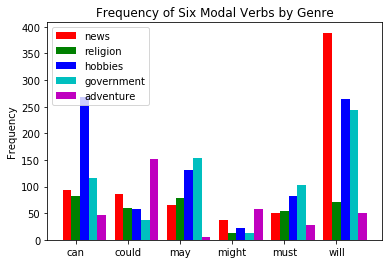

In [116]:
# Natural Language Toolkit: code_modal_plot
import nltk
from numpy import arange
from matplotlib import pyplot

colors = 'rgbcmyk' # red, green, blue, cyan, magenta, yellow, black
def bar_chart(categories, words, counts):
    "Plot a bar chart showing counts for each word by category"
    ind = arange(len(words))
    width = 1 / (len(categories) + 1)
    bar_groups = []
    for c in range(len(categories)):
        bars = pyplot.bar(ind+c*width, counts[categories[c]], width,
                         color=colors[c % len(colors)])
        bar_groups.append(bars)
    pyplot.xticks(ind+width, words)
    pyplot.legend([b[0] for b in bar_groups], categories, loc='upper left')
    pyplot.ylabel('Frequency')
    pyplot.title('Frequency of Six Modal Verbs by Genre')
    pyplot.show()
    
genres = ['news', 'religion', 'hobbies', 'government', 'adventure']
modals = ['can', 'could', 'may', 'might', 'must', 'will']
cfdist = nltk.ConditionalFreqDist(
                 (genre, word)
                 for genre in genres
                 for word in nltk.corpus.brown.words(categories=genre)
                 if word in modals)
   
counts = {}
for genre in genres:
        counts[genre] = [cfdist[genre][word] for word in modals]
bar_chart(genres, modals, counts)

## NetworkX
定义和操作由节点和边组成的图结构

## 常用库

其他Python库

逗号分隔型数据统计表： Csv

数值计算： NumPy

Sql数据库： mysql-python

文本检索： PyLucene

访问各种文件格式，如PDF、 MSWord 和 XML（pypdf， pywin32，xml.etree）、 RSS源（如feedparser）

处理电子邮件，如imaplib， email